In [ ]:
# Importing libraries

import numpy
import matplotlib.pyplot as plt

In [ ]:
# mounting the files

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip /content/gdrive/MyDrive/Dataset.zip

Archive:  /content/gdrive/MyDrive/Dataset.zip
replace Dataset/test_set/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# importing the packages
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# training_data information

training_data = datagen.flow_from_directory('/content/Dataset/training_set/',class_mode = 'binary', batch_size = 84, target_size=(200,200))


Found 5319 images belonging to 2 classes.


In [ ]:
# testing_data information

testing_data = datagen.flow_from_directory('/content/Dataset/test_set/',class_mode = 'binary', batch_size = 84, target_size=(200,200))

Found 2032 images belonging to 2 classes.


In [ ]:
sample_data, _ = next(training_data)

In [ ]:
def plotImages(images):
  fig, axes = plt.subplots(1, 5, figsize = (20,20))
  axes = axes.flatten()
  for img,ax in zip(images,axes):
      ax.imshow(img)
  plt.tight_layout()    
  plt.show()

In [ ]:
import tensorflow as tf
from keras import layers
from keras import models

In [ ]:
# define the model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))
model.summary()

                   


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               40960128  
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
 # compile the model
 
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# fit model

history = model.fit(training_data, steps_per_epoch=len(training_data),
	validation_data=testing_data, validation_steps=len(testing_data), epochs=5)

Epoch 1/5
64/64 [==============================] - 27s 410ms/step - loss: 18.2167 - accuracy: 0.7450 - val_loss: 3.0105 - val_accuracy: 0.5015
Epoch 2/5
64/64 [==============================] - 25s 395ms/step - loss: 1.9274 - accuracy: 0.7520 - val_loss: 1.3763 - val_accuracy: 0.5015
Epoch 3/5
64/64 [==============================] - 25s 394ms/step - loss: 0.3756 - accuracy: 0.7511 - val_loss: 0.8493 - val_accuracy: 0.5015
Epoch 4/5
64/64 [==============================] - 25s 395ms/step - loss: 0.2624 - accuracy: 0.7533 - val_loss: 0.8328 - val_accuracy: 0.5015
Epoch 5/5
64/64 [==============================] - 25s 393ms/step - loss: 0.1337 - accuracy: 0.7535 - val_loss: 1.1995 - val_accuracy: 0.5015


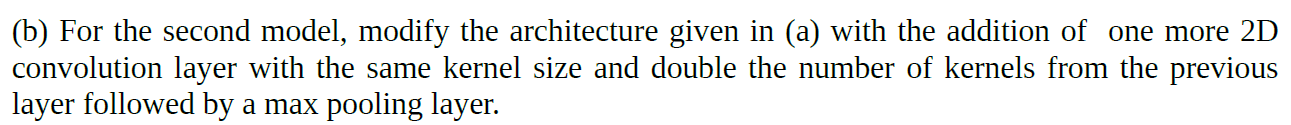

In [ ]:
# define the model

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten()) 
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(1, activation='softmax'))
model1.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 160000)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               20480128  
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

In [ ]:
 model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model1.fit(training_data, steps_per_epoch=len(training_data),
	validation_data=testing_data, validation_steps=len(testing_data), epochs=5)

Epoch 1/5
64/64 [==============================] - 27s 415ms/step - loss: 7.1236 - accuracy: 0.7532 - val_loss: 0.7556 - val_accuracy: 0.5015
Epoch 2/5
64/64 [==============================] - 26s 410ms/step - loss: 0.5033 - accuracy: 0.7574 - val_loss: 0.8148 - val_accuracy: 0.5015
Epoch 3/5
64/64 [==============================] - 26s 411ms/step - loss: 0.3957 - accuracy: 0.7559 - val_loss: 0.7856 - val_accuracy: 0.5015
Epoch 4/5
64/64 [==============================] - 26s 413ms/step - loss: 0.2591 - accuracy: 0.7535 - val_loss: 0.9882 - val_accuracy: 0.5015
Epoch 5/5
64/64 [==============================] - 26s 410ms/step - loss: 0.1357 - accuracy: 0.7659 - val_loss: 1.1915 - val_accuracy: 0.5015


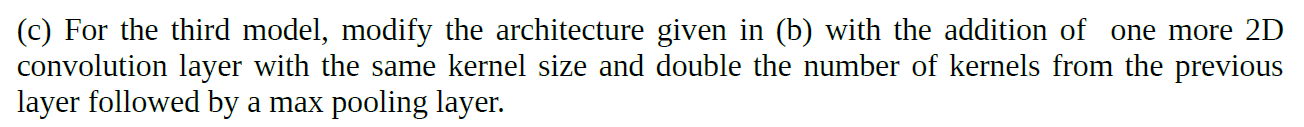

In [ ]:
# define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 80000)            

In [ ]:
 #compile the model
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#fit the model
history = model.fit(training_data, steps_per_epoch=len(training_data),
	validation_data=testing_data, validation_steps=len(testing_data), epochs=5)

Epoch 1/5
64/64 [==============================] - 28s 430ms/step - loss: 3.4561 - accuracy: 0.7566 - val_loss: 0.8369 - val_accuracy: 0.5015
Epoch 2/5
64/64 [==============================] - 27s 418ms/step - loss: 0.4832 - accuracy: 0.7542 - val_loss: 0.7033 - val_accuracy: 0.5015
Epoch 3/5
64/64 [==============================] - 27s 422ms/step - loss: 0.4181 - accuracy: 0.7340 - val_loss: 0.7082 - val_accuracy: 0.5015
Epoch 4/5
64/64 [==============================] - 27s 425ms/step - loss: 0.3240 - accuracy: 0.7536 - val_loss: 0.7411 - val_accuracy: 0.5015
Epoch 5/5
64/64 [==============================] - 27s 426ms/step - loss: 0.2471 - accuracy: 0.7566 - val_loss: 0.8679 - val_accuracy: 0.5015


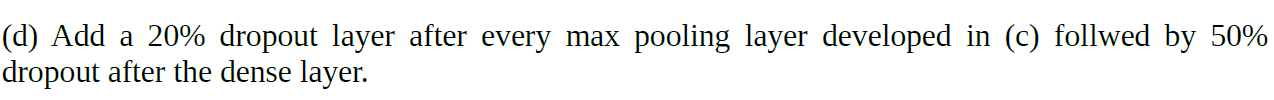

In [ ]:
#define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten()) 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 50, 50, 128)     

In [ ]:
 #compile the model
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#fit the model
history = model.fit(training_data, steps_per_epoch=len(training_data),
	validation_data=testing_data, validation_steps=len(testing_data), epochs=5)

Epoch 1/5
64/64 [==============================] - 29s 436ms/step - loss: 11.6327 - accuracy: 0.7566 - val_loss: 0.6856 - val_accuracy: 0.5015
Epoch 2/5
64/64 [==============================] - 28s 434ms/step - loss: 0.5506 - accuracy: 0.7536 - val_loss: 0.7771 - val_accuracy: 0.5015
Epoch 3/5
64/64 [==============================] - 27s 426ms/step - loss: 0.5252 - accuracy: 0.7610 - val_loss: 0.6922 - val_accuracy: 0.5015
Epoch 4/5
64/64 [==============================] - 27s 428ms/step - loss: 0.5126 - accuracy: 0.7535 - val_loss: 0.6553 - val_accuracy: 0.5015
Epoch 5/5
64/64 [==============================] - 28s 439ms/step - loss: 0.4855 - accuracy: 0.7492 - val_loss: 0.6502 - val_accuracy: 0.5015


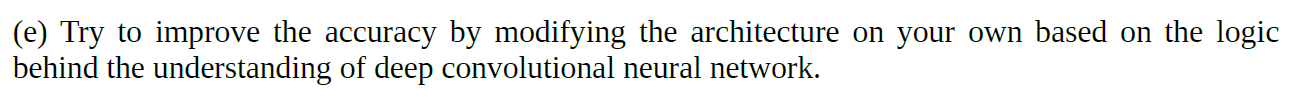

In [ ]:
# training data details

training_data = datagen.flow_from_directory('/content/Dataset/training_set/',class_mode = 'binary', batch_size = 84, target_size=(100,100))


Found 5319 images belonging to 2 classes.


In [ ]:
# testing data details

testing_data = datagen.flow_from_directory('/content/Dataset/test_set/',class_mode = 'binary', batch_size = 84, target_size=(100,100))

Found 2032 images belonging to 2 classes.


In [ ]:
# define the model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten()) 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 25, 25, 128)     

In [ ]:
#compile the model

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training_data, steps_per_epoch=len(training_data),
	validation_data=testing_data, validation_steps=len(testing_data), epochs=8)

Epoch 1/8
64/64 [==============================] - 23s 339ms/step - loss: 1.0030 - accuracy: 0.7505 - val_loss: 0.6946 - val_accuracy: 0.5015
Epoch 2/8
64/64 [==============================] - 21s 334ms/step - loss: 0.5883 - accuracy: 0.7530 - val_loss: 0.6940 - val_accuracy: 0.5015
Epoch 3/8
64/64 [==============================] - 22s 337ms/step - loss: 0.5850 - accuracy: 0.7534 - val_loss: 0.6949 - val_accuracy: 0.5015
Epoch 4/8
64/64 [==============================] - 21s 334ms/step - loss: 0.5721 - accuracy: 0.7572 - val_loss: 0.6955 - val_accuracy: 0.5015
Epoch 5/8
64/64 [==============================] - 21s 332ms/step - loss: 0.5847 - accuracy: 0.7493 - val_loss: 0.6962 - val_accuracy: 0.5015
Epoch 6/8
64/64 [==============================] - 22s 338ms/step - loss: 0.5725 - accuracy: 0.7552 - val_loss: 0.6966 - val_accuracy: 0.5015
Epoch 7/8
64/64 [==============================] - 22s 339ms/step - loss: 0.5735 - accuracy: 0.7534 - val_loss: 0.6960 - val_accuracy: 0.5015
Epoch 